In [93]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Collect the information of dataset

In [101]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno 

data_path = '/content/gdrive/MyDrive/Bayesian_Network_Adult_Income/adult.csv'
data = pd.read_csv(data_path)

data.rename({"education.num":"education-num","marital.status":"marital-status","capital.gain":"capital-gain","capital.loss":"capital-loss",
         "hours.per.week":"hours-per-week","native.country":"native-country"},axis=1,inplace=True)

pd.options.display.max_columns = None
display(data.head())
display(data.describe().T)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [ ]:
sns.countplot(data["education.num"],palette="bright")

In [ ]:
object_describe=data.describe(include=["object"]).T
display(object_describe)

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital.status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native.country,32561,42,United-States,29170
income,32561,2,<=50K,24720


In [ ]:
object_columns=data.select_dtypes(include=["object"]).columns 
for i in range(len(object_columns)):
    print("----- {}-----".format(object_columns[i]))
    print(data[object_columns[i]].value_counts()) 

----- workclass-----
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
----- education-----
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
----- marital.status-----
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64
----- occupation-----
Prof-special

In [102]:
data=data.replace("?",np.nan) 
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [ ]:
msno.matrix(data) 

In [ ]:
sns.pairplot(data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


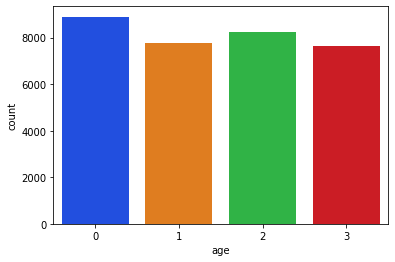

In [103]:
# disceret age :-28-37-48-
data.loc[data['age']<=28,'age']=0
data.loc[(data['age']>28)&(data['age']<=37),'age']=1
data.loc[(data['age']>37)&(data['age']<=48),'age']=2
data.loc[data['age']>48,'age']=3
sns.countplot(data["age"],palette="bright")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


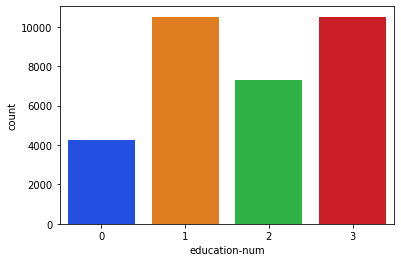

In [104]:
# disceret education.num :<9,=9,=10,>10
data.loc[data['education-num']<9,'education-num']=0
data.loc[(data['education-num']>=9)&(data['education-num']<10),'education-num']=1
data.loc[(data['education-num']>=10)&(data['education-num']<11),'education-num']=2
data.loc[data['education-num']>=11,'education-num']=3
sns.countplot(data['education-num'],palette="bright")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


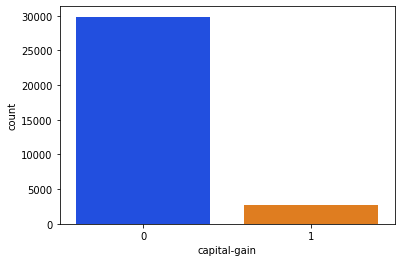

In [105]:
# disceret capital.gain :=0,>0
data.loc[data['capital-gain']<1,'capital-gain']=0
data.loc[data['capital-gain']>=1,'capital-gain']=1

sns.countplot(data['capital-gain'],palette="bright")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


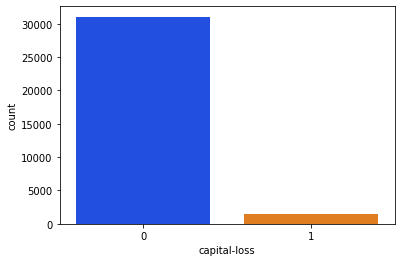

In [106]:
# disceret capital.loss :=0,>0
data.loc[data['capital-loss']<1,'capital-loss']=0
data.loc[data['capital-loss']>=1,'capital-loss']=1

sns.countplot(data['capital-loss'],palette="bright")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


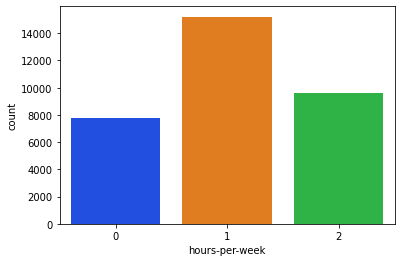

In [107]:
# disceret hours.per.week :>40,=40,<40
data.loc[data['hours-per-week']<40,'hours-per-week']=0
data.loc[(data['hours-per-week']==40),'hours-per-week']=1
data.loc[(data['hours-per-week']>40),'hours-per-week']=2
sns.countplot(data['hours-per-week'],palette="bright")

In [ ]:
data.to_csv('/content/gdrive/MyDrive/Bayesian_Network_Adult_Income/adult_processed.csv')

In [111]:
#data = data.drop(columns=['workclass','fnlwgt','education-num','race','native-country'])
display(data.head())
#data.to_csv('/content/gdrive/MyDrive/Bayesian_Network_Adult_Income/adult_processed_planA.csv')

,age,education,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,income
0,3,HS-grad,Widowed,NaN,Not-in-family,Female,0,1,1,<=50K
1,3,HS-grad,Widowed,Exec-managerial,Not-in-family,Female,0,1,0,<=50K
2,3,Some-college,Widowed,NaN,Unmarried,Female,0,1,1,<=50K
3,3,7th-8th,Divorced,Machine-op-inspct,Unmarried,Female,0,1,1,<=50K
4,2,Some-college,Separated,Prof-specialty,Own-child,Female,0,1,1,<=50K
